In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress
rcParams['figure.figsize'] = 14,10
plt.style.use('ggplot')
plt.style.use('seaborn')

# NY Times Data
generic_ballot = "../Approval_ratings /generic_polllist.csv"
us_counties = "../covid_data/us-counties.csv"
us_states = "../covid_data/us-states.csv"
us_total = "../covid_data/us.csv"
general_ballot = pd.read_csv(generic_ballot)
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

general_ballot.head()

,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,...,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,All polls,7/17/2020,11/30/2018,12/2/2018,Winston Group,B/C,1000,rv,0.753612,0.0,...,41.0,46.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66565,124055,5/29/2020,18:00:11 17 Jul 2020
1,All polls,7/17/2020,12/29/2018,12/30/2018,Winston Group,B/C,1000,rv,0.611841,0.0,...,41.0,47.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66581,124115,5/29/2020,18:00:11 17 Jul 2020
2,All polls,7/17/2020,12/31/2018,1/2/2019,HarrisX,C,3012,rv,0.032487,0.0,...,35.0,49.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57208,92471,1/3/2019,18:00:11 17 Jul 2020
3,All polls,7/17/2020,1/1/2019,1/3/2019,HarrisX,C,3012,rv,0.031667,0.0,...,35.0,48.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57218,92479,1/4/2019,18:00:11 17 Jul 2020
4,All polls,7/17/2020,1/2/2019,1/4/2019,HarrisX,C,3003,rv,0.030810,0.0,...,36.0,47.910864,40.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57221,92483,1/5/2019,18:00:11 17 Jul 2020


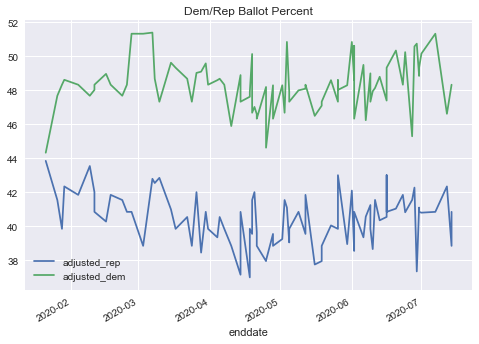

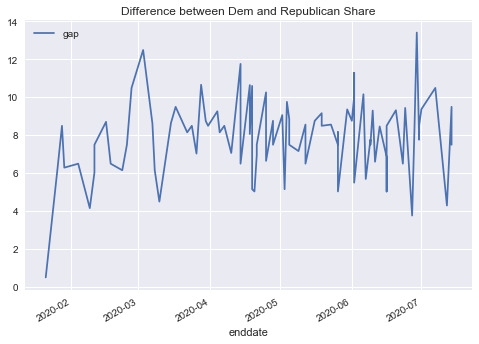

In [6]:
# created a new collumn named 'change' that calculates the difference in percent of generic ballot by taking the difference between the dem and rep totals. This will be graphed below.
general_ballot['gap'] = (general_ballot['adjusted_dem']-general_ballot['adjusted_rep'])


general_ballot['enddate'] = pd.to_datetime(general_ballot['enddate'])

generic_ballot_2020 = general_ballot.loc[general_ballot['enddate'] >= '2020-1-20']

#This groups the survey data by enddate and takes the mean if there are multiple survey enddates on the same day

generic_ballot_2020.groupby('enddate').aggregate({'adjusted_dem': 'mean', 'adjusted_rep': 'mean'})
generic_ballot_2020.plot(x='enddate', y=['adjusted_rep', 'adjusted_dem'], title= 'Dem/Rep Ballot Percent');

# Charting Difference Between Dem/Rep Generic Ballot Since Start of Covid
generic_ballot_2020.plot(x='enddate', y='gap', title='Difference between Dem and Republican Share')

In [7]:
# shrinking us dataframe to only dates and deaths for our graphs
cases_death = us[['date','deaths']]
cases_death['date_adj']  = pd.to_datetime(cases_death['date'])
cases_death.head(5)

,date,deaths,date_adj
0,2020-01-21,0,2020-01-21
1,2020-01-22,0,2020-01-22
2,2020-01-23,0,2020-01-23
3,2020-01-24,0,2020-01-24
4,2020-01-25,0,2020-01-25


In [8]:
# Scatter Plot of Deaths vs General Ballot
# First create one dataframe to get 
gen_ballot = generic_ballot_2020.rename(columns={'enddate': 'date'})
us['date'] = pd.to_datetime(us['date'])


ballot_covid_deaths = us.merge(gen_ballot, on=['date'])
ballot_covid_deaths.drop(columns=['url', 'population', 'multiversions', 'tracking', 'poll_id', 'question_id', 'timestamp', 'createddate'], inplace=True)
ballot_covid_deaths.head(17)

,date,cases,deaths,subgroup,modeldate,startdate,pollster,grade,samplesize,weight,influence,dem,rep,adjusted_dem,adjusted_rep,gap
0,2020-01-21,1,0,All polls,7/17/2020,1/19/2020,YouGov,B,1176,0.202099,0.003336,44.0,43.0,44.322521,43.841741,0.480780
1,2020-01-26,5,0,All polls,7/17/2020,1/24/2020,Morning Consult,B/C,1992,0.300257,0.006563,45.0,39.0,47.673395,41.538390,6.135005
2,2020-01-28,5,0,All polls,7/17/2020,1/26/2020,YouGov,B,1182,0.200788,0.004808,48.0,39.0,48.322521,39.841741,8.480780
3,2020-01-29,5,0,All polls,7/17/2020,1/26/2020,NBC News/The Wall Street Journal,A-,1000,1.436950,0.054071,49.0,43.0,48.611492,42.338398,6.273094
4,2020-02-04,11,0,All polls,7/17/2020,2/2/2020,YouGov,B,1277,0.214305,0.006728,48.0,41.0,48.322521,41.841741,6.480780
5,2020-02-09,12,0,All polls,7/17/2020,2/7/2020,Morning Consult,B/C,1996,0.279777,0.011107,45.0,41.0,47.673395,43.538390,4.135005
6,2020-02-11,13,0,All polls,7/17/2020,2/7/2020,McLaughlin & Associates,C/D,1000,0.488257,0.019228,47.0,45.0,48.016850,42.001568,6.015282
7,2020-02-11,13,0,All polls,7/17/2020,2/9/2020,YouGov,B,1140,0.189365,0.007359,48.0,40.0,48.322521,40.841741,7.480780
8,2020-02-16,15,0,All polls,7/17/2020,2/13/2020,Marist College,A+,1164,2.159829,0.151321,48.0,40.0,48.961005,40.271317,8.689688
9,2020-02-18,25,0,All polls,7/17/2020,2/16/2020,YouGov,B,1150,0.189133,0.008785,48.0,41.0,48.322521,41.841741,6.480780


In [9]:
df_general_ballot = ballot_covid_deaths[['pollster']]
df_general_ballot.head(5)

,pollster
0,YouGov
1,Morning Consult
2,YouGov
3,NBC News/The Wall Street Journal
4,YouGov


In [10]:
YouGov = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'YouGov']
Morning_Consult = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Morning Consult']
McLaughlin_Associates = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'McLaughlin & Associates']
Marist_College = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Marist_College']
CNN_SSRS = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'CNN/SSRS']
RMG_Research = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'RMG Research']
NBC_News_The_Wall_Street_Journal = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'NBC News/The Wall Street Journal']
Democracy_Fund_UCLA_Nationscape = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Democracy Fund + UCLA Nationscape']
Climate_Nexus = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Climate Nexus']
Øptimus = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Øptimus']
Firehouse_Strategies_Øptimus = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Firehouse Strategies/Øptimus']
elzer_Co = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Selzer & Co.']
Monmouth_University = ballot_covid_deaths.loc[ballot_covid_deaths['pollster'] == 'Monmouth University']
Firehouse_Strategies_Øptimus

,date,cases,deaths,subgroup,modeldate,startdate,pollster,grade,samplesize,weight,influence,dem,rep,adjusted_dem,adjusted_rep,gap
22,2020-03-28,123966,2300,All polls,7/17/2020,3/21/2020,Firehouse Strategies/Øptimus,B/C,1032,0.275823,0.039162,47.0,36.6,49.089754,38.443659,10.646095
25,2020-04-04,312525,9488,All polls,7/17/2020,3/28/2020,Firehouse Strategies/Øptimus,B/C,937,0.226814,0.039168,46.5,37.5,48.589754,39.343659,9.246095
28,2020-04-10,499381,21084,All polls,7/17/2020,4/4/2020,Firehouse Strategies/Øptimus,B/C,814,0.091054,0.017976,43.8,37.0,45.889754,38.843659,7.046095
29,2020-04-14,610709,29318,All polls,7/17/2020,4/7/2020,Firehouse Strategies/Øptimus,B/C,732,0.092321,0.019753,46.8,35.3,48.889754,37.143659,11.746095
31,2020-04-18,732262,38659,All polls,7/17/2020,4/11/2020,Firehouse Strategies/Øptimus,B/C,745,0.068489,0.015766,45.8,38.0,47.889754,39.843659,8.046095
36,2020-04-21,810434,44688,All polls,7/17/2020,4/14/2020,Firehouse Strategies/Øptimus,B/C,829,0.099665,0.024164,44.5,37.8,46.589754,39.643659,6.946095
38,2020-04-25,944184,53326,All polls,7/17/2020,4/18/2020,Firehouse Strategies/Øptimus,B/C,784,0.069350,0.017898,46.1,36.1,48.189754,37.943659,10.246095
40,2020-04-28,1018741,58416,All polls,7/17/2020,4/21/2020,Firehouse Strategies/Øptimus,B/C,766,0.089218,0.024076,46.2,37.7,48.289754,39.543659,8.746095
42,2020-05-02,1139075,66485,All polls,7/17/2020,4/25/2020,Firehouse Strategies/Øptimus,B/C,765,0.065928,0.018829,46.2,37.4,48.289754,39.243659,9.046095
45,2020-05-05,1210881,71139,All polls,7/17/2020,4/28/2020,Firehouse Strategies/Øptimus,B/C,758,0.086287,0.025691,45.8,37.2,47.889754,39.043659,8.846095


In [13]:
x_data = Firehouse_Strategies_Øptimus[['date']]
y_data = Firehouse_Strategies_Øptimus[['adjusted_rep']]
y_data_deaths = Firehouse_Strategies_Øptimus[['deaths']]

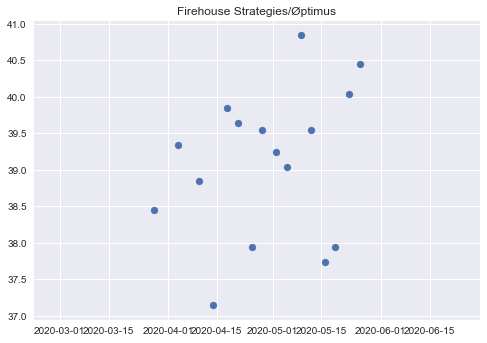

In [15]:
plt.scatter(x = x_data, y = y_data)
plt.title('Firehouse Strategies/Øptimus');

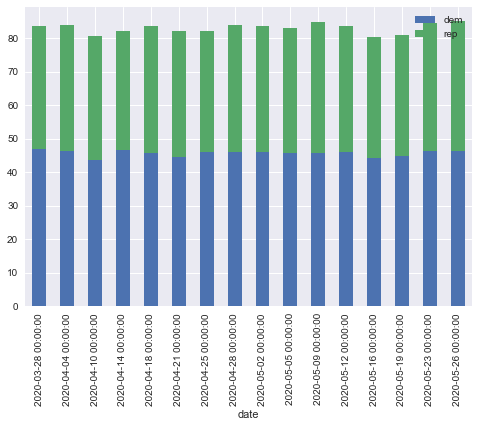

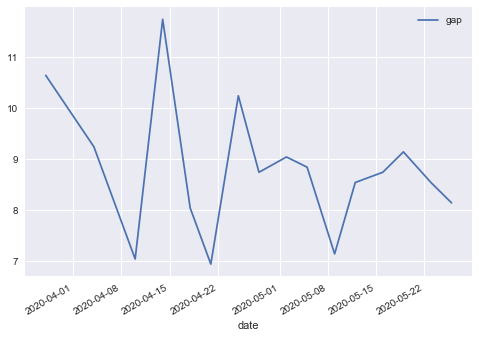

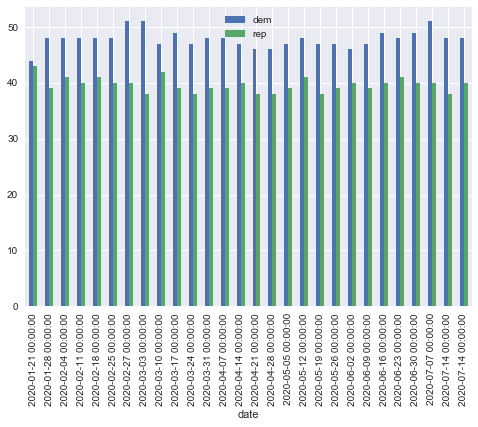

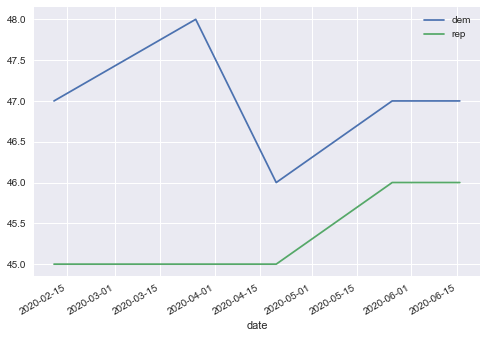

In [16]:
Firehouse_Strategies_Øptimus.plot.bar(y=['dem', 'rep'], x='date', stacked=True); Firehouse_Strategies_Øptimus.plot(y='gap', x='date')
YouGov.plot.bar(y=['dem', 'rep'], x='date'); McLaughlin_Associates.plot(y=['dem', 'rep'], x='date')

In [17]:
# Covid-19 death per parties rating 
df_ballot_covid_death = ballot_covid_deaths[['date', 'deaths', 'adjusted_dem', 'adjusted_rep']]
df_ballot_covid_death

,date,deaths,adjusted_dem,adjusted_rep
0,2020-01-21,0,44.322521,43.841741
1,2020-01-26,0,47.673395,41.538390
2,2020-01-28,0,48.322521,39.841741
3,2020-01-29,0,48.611492,42.338398
4,2020-02-04,0,48.322521,41.841741
...,...,...,...,...
80,2020-07-01,128103,50.151941,40.794626
81,2020-07-07,131289,51.322521,40.841741
82,2020-07-12,134977,46.611492,42.338398
83,2020-07-14,136356,48.322521,38.841741


In [36]:
#creating a bin to hold our data to be graphed later
bin_death = df_ballot_covid_death.groupby([pd.Grouper(key='date', freq='W')])['deaths'].mean().reset_index().sort_values('date')
bin_dem = df_ballot_covid_death.groupby([pd.Grouper(key='date', freq='W')])['adjusted_dem'].mean().reset_index().sort_values('date')
bin_rep = df_ballot_covid_death.groupby([pd.Grouper(key='date', freq='W')])['adjusted_rep'].mean().reset_index().sort_values('date')
# print(bin_death)
# print(bin_approve)
# print(bin_dis)

frames = [bin_death, bin_dem, bin_rep]
bin_death['dem'] = bin_dem['adjusted_dem']
bin_death['rep'] = bin_rep['adjusted_rep']
bin = bin_death.rename(columns={'date': 'week'})
bin.columns

Index(['week', 'deaths', 'dem', 'rep'], dtype='object')

In [37]:
bin_death

,date,deaths,dem,rep
0,2020-01-26,0.000000,45.997958,42.690066
1,2020-02-02,0.000000,48.467006,41.090069
2,2020-02-09,0.000000,47.997958,42.690066
3,2020-02-16,0.000000,48.433459,41.038209
4,2020-02-23,0.000000,47.997958,41.690066
5,2020-03-01,0.000000,49.822521,40.841741
6,2020-03-08,17.000000,50.461669,41.388900
7,2020-03-15,49.500000,48.469365,41.914012
8,2020-03-22,287.500000,48.997958,40.190066
9,2020-03-29,1479.333333,48.476375,39.762323


In [45]:
import os
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# Make figure overlaying COVID Deaths and Republicans Rating
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Bar(x=bin_death['date'], y=bin_death['deaths'], marker_color='green'))

fig.add_trace(go.Scatter(x=bin_death['date'], y=bin_death['rep'], mode = 'markers+lines', line=dict(color='red', width=4)), secondary_y=True)

fig.update_layout(title="<b>Republicans Ballot vs. Covid Deaths in the US</b>", xaxis_title="<b>Weeks</b>", 
                 yaxis_title="<b>Covid Deaths in US</b>", showlegend=False, autosize=False, font=dict(family="Arial, monospace",size=14,color="darkgoldenrod"))
fig.update_yaxes(title_text="<b>Republicans Ballot</b>", secondary_y=True)


In [20]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly_express

In [30]:
!{sys.executable} -c plotly-orca

Traceback (most recent call last):
  File "<string>", line 1, in <module>
NameError: name 'plotly' is not defined


In [46]:
# Make figure overlaying COVID Deaths and Democrates Rating
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Bar(x=bin['week'], y=bin['deaths'], marker_color='green'))

fig.add_trace(go.Scatter(x=bin['week'], y=bin['dem'], mode = 'markers+lines', line=dict(color='blue', width=4)), secondary_y=True)

fig.update_layout(title="<b>Democrates Ballot vs. Covid Deaths in the US</b>", xaxis_title="<b>Weeks</b>", 
                  yaxis_title="<b>Covid Deaths in US</b>", showlegend=False, autosize=False, font=dict(family="Arial, monospace",size=14,color="darkgoldenrod"))
fig.update_yaxes(title_text="<b>Democrates Ballot</b>", secondary_y=True)